In [1]:
import ee
ee.Authenticate()
ee.Initialize()
# print(ee.Image("NASA/NASADEM_HGT/001").get("title").getInfo())


Successfully saved authorization token.


In [2]:
import contextily
import matplotlib.pyplot as plt


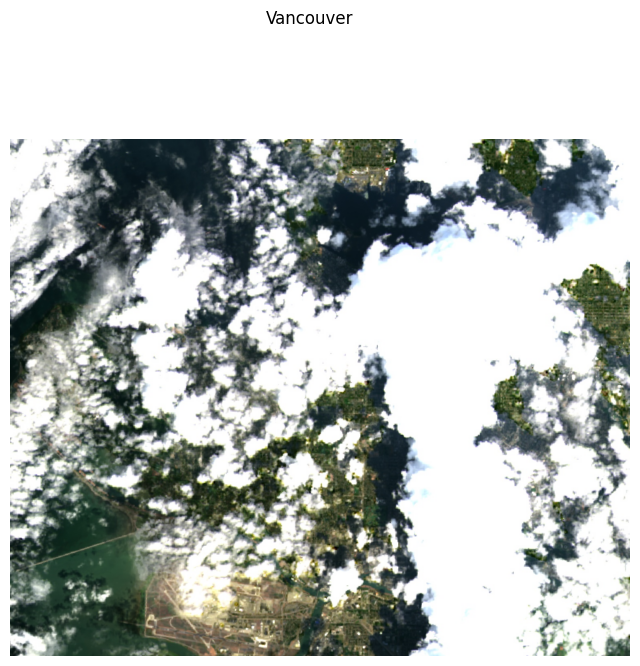

In [3]:
l8 = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")
Van_pt = ee.Geometry.Point(-123, 49.25)
Van = l8.filterDate("2017-07-15", "2017-08-16")\
        .filterBounds(Van_pt)\
        .mosaic()
viz_params = {
  "bands": ["B4", "B3", "B2"],
  "gain": '0.1, 0.1, 0.1',
  "scale":20
}
url_Van = Van.getMapId(viz_params)["tile_fetcher"].url_format
map_Van = contextily.Place("Vancouver, BC", source=url_Van)

f, ax = plt.subplots(1, figsize=(8, 8))
# for i, m in enumerate([map_pre, map_aft]):
    # ax = axs[i]
map_Van.plot(ax=ax)
ax.set_axis_off()
f.suptitle("Vancouver")
plt.show()